In [1]:
import codecs
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
%pylab inline

#only first time
nltk.download("punkt")
nltk.download("stopwords")

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
book_filename = 'tweets.txt'
corpus_raw = u""
with codecs.open(book_filename, "r", "utf-8") as book_file:
    corpus_raw += book_file.read()
    
s = tokenizer.tokenize(corpus_raw)
#s = [s.lower() for line in s]

In [10]:
m=list()
for i in range(20723):
    m.append(TextBlob(s[i]))
p = list()
for j in range(20723):
    p.append(m[j].sentiment.polarity)  
pos = 0
neg = 0
neu = 0
for k in range(20723):
    if p[k]>0:
        pos+=1
    if p[k]<0:
        neg+=1
    if p[k]==0:
        neu+=1

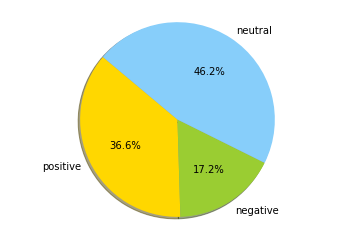

In [11]:
labels = 'positive','negative','neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen','lightskyblue'] 
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [15]:
df = pd.DataFrame(p, columns=["score"])
df.to_csv('sentiments.csv', index=False)